[Video 7](https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7)

In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import json

# Importation des données
---

Depuis une api de keras

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

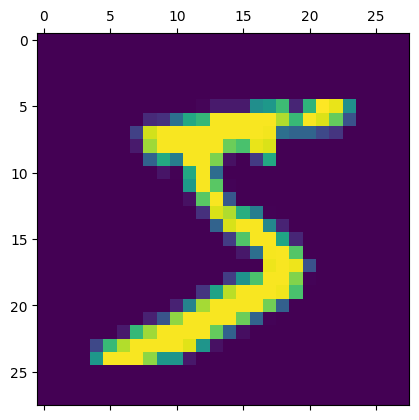

In [7]:
plt.matshow(X_train[0]) # faire apparaitre l'image grace à matplotlib

In [8]:
y_train[5]

2

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train.shape # trois dimensions (nbr image, puis les deux dimensions des images)

(60000, 28, 28)

In [11]:
# Scaling values : scale frome 0 to 1
# nos valeurs sont sur 255 donc on les divises par 255 pour obtenir une valeur entre 0 et 1
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
# Scaling data is a technique that improve acurracy of machine learning models

In [12]:
X_train_scaled_flattened = X_train_scaled.reshape(len(X_train_scaled), 28*28) # applatir les image : passer d'un tableau à deux dimension à un tableau à 1 dimension
X_test_scaled_flattened = X_test_scaled.reshape(len(X_test_scaled), 28*28)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_scaled_flattened.shape # deux dimensions (nbr image, image applatit)

(60000, 784)

In [14]:
X_test_scaled_flattened.shape # deux dimensions (nbr image, image applatit)

(10000, 784)

In [15]:
X_train_scaled_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Création du modèle
---

In [16]:
# Création du modèle
model = keras.Sequential([
    keras.layers.Dense(10, # couche de sortie
                      input_shape=(784,), # couche d'entrée
                      activation='sigmoid' # fonction d'activation
                      )
])

# Après, on doit compiler le modèle
model.compile(
    optimizer='adam', #
    loss='sparse_categorical_crossentropy', # categorical: 0 to 9, sparse: output in int
    metrics=['accuracy'] # the goal is to make the modèle more accurate
  )

model.fit(X_train_scaled_flattened, y_train, epochs=5) # where the training is happening. Supplying the training set
# epochs => nombre d'itération de notre modèle

c:\Users\yfour\Documents\EnvsPython\Tensorflow_cours\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8140 - loss: 0.7162
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.9102 - loss: 0.3197
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - accuracy: 0.9189 - loss: 0.2866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.9231 - loss: 0.2765
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.9265 - loss: 0.2691


In [17]:
model.evaluate(X_test_scaled_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.9160 - loss: 0.3058


[0.2698701322078705, 0.9258999824523926]

# Sample prédictions
---

Just for fun

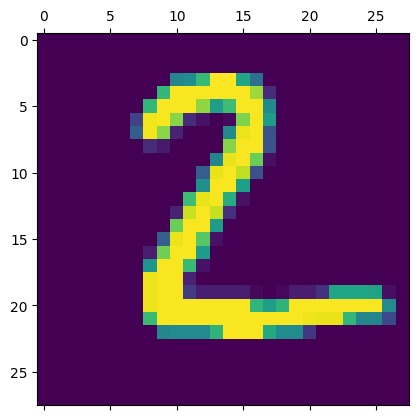

In [18]:
plt.matshow(X_test[1])

In [19]:
y_predicted = model.predict(X_test_scaled_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


array([3.9614275e-01, 3.4825916e-03, 9.9913812e-01, 3.2691413e-01,
       3.2969555e-10, 7.7659380e-01, 8.5803473e-01, 8.1063568e-13,
       2.1328768e-01, 2.3812681e-09], dtype=float32)

In [20]:
np.argmax(y_predicted[1])

2

# Confusion matrix
---

Matrice de confusion : elles permet de montrer graphiquement les performances des prédictions de notre modèle

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels) # confusion matrix
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    2,    0,    5,    9,    3,    4,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    9,  904,   26,    6,    4,   12,   11,   49,    5],
       [   2,    0,   10,  932,    0,   22,    2,   11,   24,    7],
       [   1,    1,    2,    2,  903,    0,   14,    4,   11,   44],
       [   7,    1,    1,   32,    8,  781,   15,    6,   35,    6],
       [   7,    3,    3,    2,    7,   11,  921,    2,    2,    0],
       [   1,    6,   20,    9,    4,    0,    0,  956,    4,   28],
       [   4,    7,    6,   22,    9,   21,    8,   12,  879,    6],
       [   9,    7,    1,   11,   22,    8,    0,   25,   10,  916]])>

Text(95.72222222222221, 0.5, 'Truth')

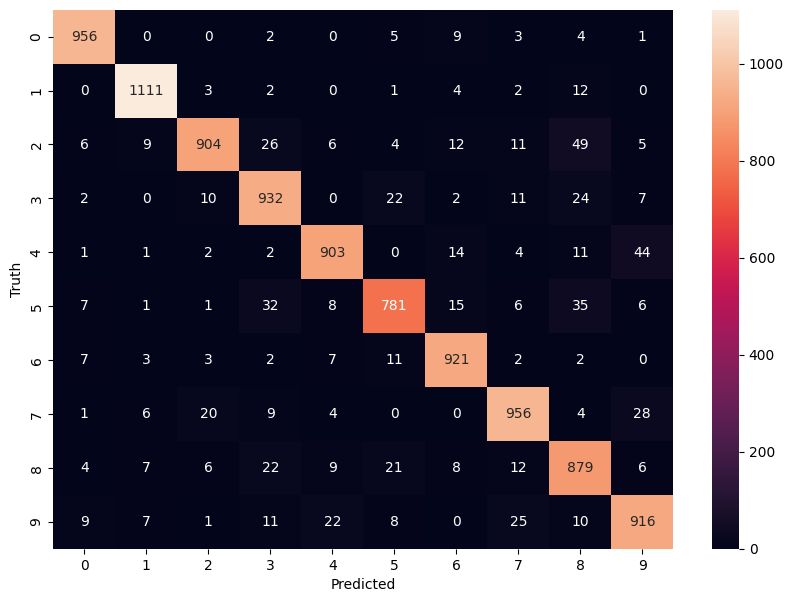

In [24]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add hidden layers to the model
---


In [25]:
# Ajout de couche de neurones cachée
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # input and hidden layers
    keras.layers.Dense(10, activation='sigmoid') # output layers
])

# Après, on doit compiler le modèle
model2.compile(
    optimizer='adam', #
    loss='sparse_categorical_crossentropy', # categorical: 0 to 9, sparse: output in int
    metrics=['accuracy'] # the goal is to make the modèle more accurate
  )

model2.fit(X_train_scaled_flattened, y_train, epochs=5) # where the training is happening. Supplying the training set
# epochs => nombre d'itération de notre modèle

Epoch 1/5


c:\Users\yfour\Documents\EnvsPython\Tensorflow_cours\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - accuracy: 0.8730 - loss: 0.4497
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9606 - loss: 0.1344
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.9754 - loss: 0.0855
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9811 - loss: 0.0651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.9845 - loss: 0.0503


In [26]:
# Evalutation du model
model2.evaluate(X_test_scaled_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9733 - loss: 0.0845


[0.07401330769062042, 0.9767000079154968]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


Text(95.72222222222221, 0.5, 'Truth')

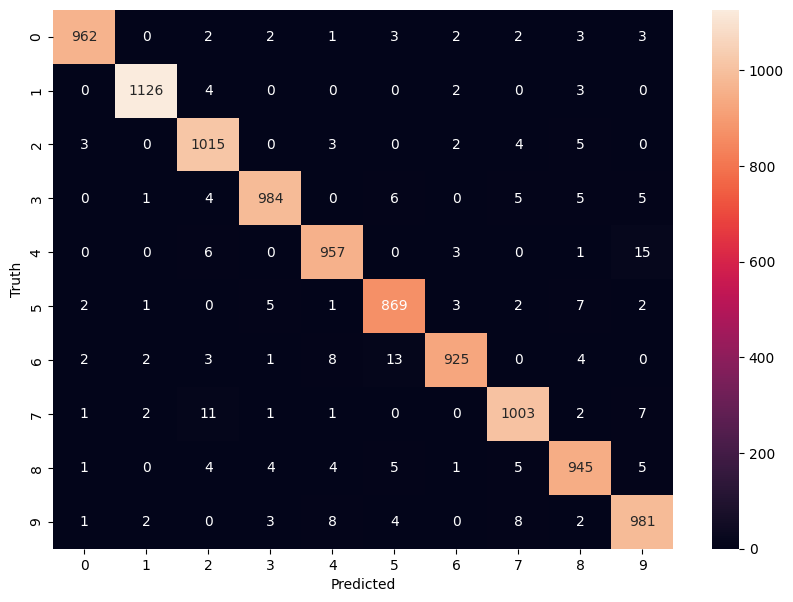

In [27]:
# Confusion matrix
y_predicted2 = model2.predict(X_test_scaled_flattened)
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2) # confusion matrix

plt.figure(figsize=(10, 7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Utilisation de keras pour applatir les array des images

In [28]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer
    keras.layers.Dense(700, activation='relu'), # hidden layer
    keras.layers.Dense(600, activation='relu'), # hidden layer
    keras.layers.Dense(500, activation='relu'), # hidden layer
    keras.layers.Dense(400, activation='relu'), # hidden layer
    keras.layers.Dense(300, activation='relu'), # hidden layer
    keras.layers.Dense(200, activation='relu'), # hidden layer
    keras.layers.Dense(100, activation='relu'), # hidden layer
    keras.layers.Dense(50, activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

model3.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10


c:\Users\yfour\Documents\EnvsPython\Tensorflow_cours\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8528 - loss: 0.4800
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9647 - loss: 0.1353
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9731 - loss: 0.1054
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9798 - loss: 0.0805
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0711
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9845 - loss: 0.0621
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0507
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0451
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9901 - loss: 0.0423
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9912 - loss: 0.0363


In [29]:
# Evalutation du model
model3.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9758 - loss: 0.1465


[0.12318196147680283, 0.9789999723434448]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

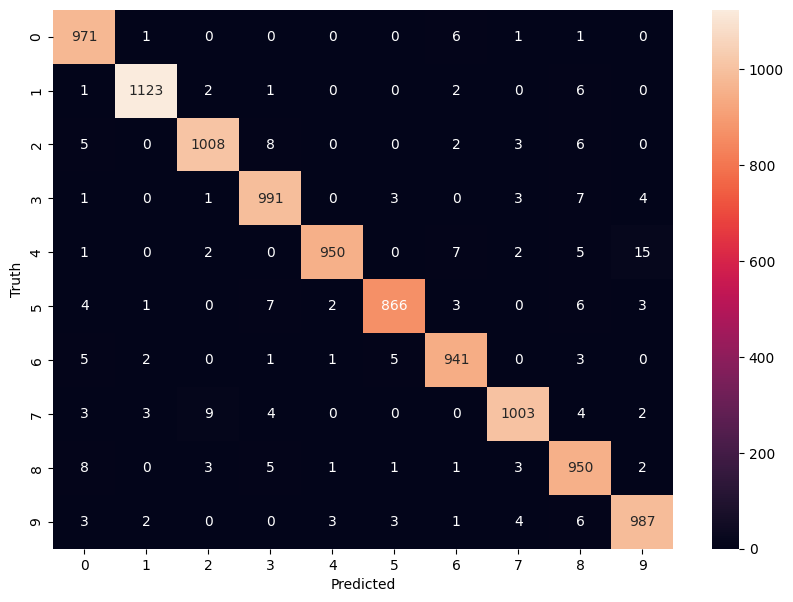

In [30]:
# Confusion matrix
y_predicted3 = model3.predict(X_test_scaled)
y_predicted_labels3 = [np.argmax(i) for i in y_predicted3]
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels3) # confusion matrix

plt.figure(figsize=(10, 7))
sn.heatmap(cm3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

In [33]:
weights2 = model2.get_weights()
with open('../json/7-model2_weights.json', 'w') as f:
    json.dump(weights2, f,indent=4, cls=NpEncoder)

In [34]:
weights3 = model3.get_weights()
with open('../json/7-model3_weights.json', 'w') as f:
    json.dump(weights3, f,indent=4, cls=NpEncoder)